# Implementing market basket analysis

In [1]:
#Loading neccesary packages
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt # Data visualization
import seaborn as sns # Advanced data visualization
%matplotlib inline

In [2]:
#Reading Data From Web
df = pd.read_excel('C:/Users/igung/kaplan/project 5/market basket analysis4/data.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Generate top receipts by countries

In [3]:
df['Country'].value_counts()

United Kingdom          495477
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [4]:
df1 = df[(df['Country'] == 'United Kingdom') & (df['Quantity']>2)]

In [5]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df1.shape

(261651, 8)

In [7]:
df.loc[df['Description'] == 'PAPER CRAFT , LITTLE BIRDIE']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540420,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
540421,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


# Data Preparation

In [8]:
#Data Cleaning
df['Description'] = df['Description'].str.strip() #removes spaces from beginning and end
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True) #removes duplicate invoice
df['InvoiceNo'] = df['InvoiceNo'].astype('str') #converting invoice number to be string
df = df[~df['InvoiceNo'].str.contains('C')]#remove the credit transactions
df = df[~df['Description'].isin(['?',' '])]#removes ? and blanks in descriptions
df = df[~df['CustomerID'].isin([' '])]#removes blanks in customerID
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
df.shape

(532574, 8)

In [10]:
df.loc[df['Description'] == ' '] #checking if blanks are in descriptions

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [11]:
df.loc[df['CustomerID'] == ' '] #checking if blanks are in descriptions

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [12]:
# checking for duplication of items
df.loc[df['Description'] == 'PAPER CRAFT , LITTLE BIRDIE']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540420,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom


## Plot chart for top 10 countries

In [13]:
country_set = df[['Country', 'InvoiceNo']]
country_set = country_set.pivot_table(columns='Country', aggfunc='count')
country1 =country_set.sort_values('InvoiceNo', axis=1, ascending=False).T.head(10)
country1

,InvoiceNo
Country,
United Kingdom,487575
Germany,9042
France,8408
EIRE,7894
Spain,2485
Netherlands,2363
Belgium,2031
Switzerland,1967
Portugal,1501


In [14]:
country1.shape

(10, 1)

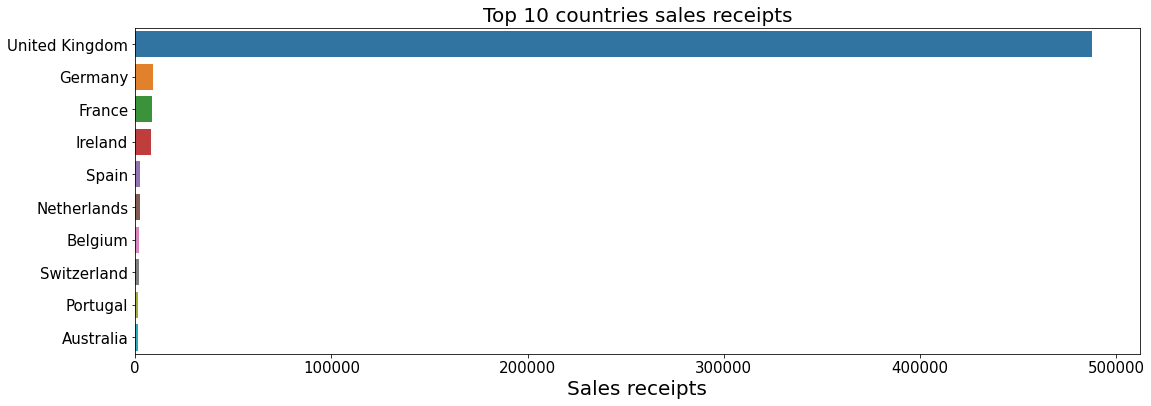

In [15]:
countries = ['United Kingdom','Germany','France','Ireland','Spain','Netherlands','Belgium','Switzerland','Portugal','Australia']
receipts = country1['InvoiceNo']

fig, (ax) = plt.subplots(1,figsize = (18, 6))
sns.barplot(x =receipts , y = countries, ax = ax)
#ax.set_ylabel('Countries', fontsize = 20)
ax.set_xlabel('Sales receipts',fontsize = 20)
ax.tick_params(labelsize=15)
ax.set_title('Top 10 countries sales receipts', fontsize = 20)
plt.savefig("Receipts1.svg")

### Generating the model for UK market

In [16]:
#Separating transactions for UK
mybasket = (df[df['Country'] =="United Kingdom"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [17]:
mybasket.head()

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
#converting all positive vaues to 1 and everything else to 0
def my_encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

my_basket_sets = mybasket.applymap(my_encode_units)
my_basket_sets.drop('POSTAGE', inplace=True, axis=1) #Remove "postage" as an item

## Generating frequent datasets

In [19]:
#Generatig frequent itemsets
my_frequent_itemsets = apriori(my_basket_sets, min_support=0.02, use_colnames=True)

In [20]:
my_rules = association_rules(my_frequent_itemsets, metric="lift", min_threshold=1)

In [21]:
#viewing top 100 rules
my_rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(60 TEATIME FAIRY CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.040440,0.060634,0.021966,0.543161,8.958062,0.019514,2.056229
1,(PACK OF 72 RETROSPOT CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.060634,0.040440,0.021966,0.362267,8.958062,0.019514,1.504643
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.047046,0.049946,0.030236,0.642694,12.867703,0.027887,2.658936
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.049946,0.047046,0.030236,0.605376,12.867703,0.027887,2.414842
4,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE PINK),0.049946,0.035231,0.021106,0.422581,11.994591,0.019347,1.670829
5,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.035231,0.049946,0.021106,0.599085,11.994591,0.019347,2.369716
6,(CHARLOTTE BAG SUKI DESIGN),(CHARLOTTE BAG PINK POLKADOT),0.043179,0.036198,0.020623,0.477612,13.194561,0.019060,1.844993
7,(CHARLOTTE BAG PINK POLKADOT),(CHARLOTTE BAG SUKI DESIGN),0.036198,0.043179,0.020623,0.569733,13.194561,0.019060,2.223783
8,(RED RETROSPOT CHARLOTTE BAG),(CHARLOTTE BAG PINK POLKADOT),0.048604,0.036198,0.025725,0.529282,14.621998,0.023966,2.047514
9,(CHARLOTTE BAG PINK POLKADOT),(RED RETROSPOT CHARLOTTE BAG),0.036198,0.048604,0.025725,0.710682,14.621998,0.023966,3.288416


In [111]:
my_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PACK OF 60 PINK PAISLEY CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.041944,0.040440,0.017186,0.409731,10.131731,0.015490,1.625631
1,(60 TEATIME FAIRY CAKE CASES),(PACK OF 60 PINK PAISLEY CAKE CASES),0.040440,0.041944,0.017186,0.424967,10.131731,0.015490,1.666088
2,(60 TEATIME FAIRY CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.040440,0.060634,0.021966,0.543161,8.958062,0.019514,2.056229
3,(PACK OF 72 RETROSPOT CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.060634,0.040440,0.021966,0.362267,8.958062,0.019514,1.504643
4,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE IVORY),0.047046,0.028142,0.016434,0.349315,12.412684,0.015110,1.493593
5,(ALARM CLOCK BAKELIKE IVORY),(ALARM CLOCK BAKELIKE GREEN),0.028142,0.047046,0.016434,0.583969,12.412684,0.015110,2.290586
6,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.047046,0.035231,0.018797,0.399543,11.340698,0.017140,1.606726
7,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.035231,0.047046,0.018797,0.533537,11.340698,0.017140,2.042934
8,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.047046,0.049946,0.030236,0.642694,12.867703,0.027887,2.658936
9,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.049946,0.047046,0.030236,0.605376,12.867703,0.027887,2.414842


In [23]:
my_rules1 = my_rules.sort_values(by=['lift'],ascending=False)

In [24]:
# reset index to start from #1
my_rules1.index = np.arange(1,len(my_rules)+1)

In [81]:
my_rules1.head(200)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(PINK REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...",0.037755,0.037648,0.026477,0.701280,18.627443,0.025056,3.221589
2,"(ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...",(PINK REGENCY TEACUP AND SAUCER),0.037648,0.037755,0.026477,0.703281,18.627443,0.025056,3.242950
3,(GREEN REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...",0.050161,0.029323,0.026477,0.527837,18.000604,0.025006,2.055810
4,"(ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.029323,0.050161,0.026477,0.902930,18.000604,0.025006,9.785133
5,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER),0.030988,0.051396,0.026477,0.854419,16.624127,0.024884,6.516004
6,(ROSES REGENCY TEACUP AND SAUCER),"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",0.051396,0.030988,0.026477,0.515152,16.624127,0.024884,1.998587
7,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.037755,0.050161,0.030988,0.820768,16.362637,0.029094,5.299498
8,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.050161,0.037755,0.030988,0.617773,16.362637,0.029094,2.517470
9,(SPACEBOY LUNCH BOX),(DOLLY GIRL LUNCH BOX),0.037648,0.037540,0.022879,0.607703,16.188033,0.021465,2.453397
10,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX),0.037540,0.037648,0.022879,0.609442,16.188033,0.021465,2.464045


In [113]:
my_rules1.to_excel("myrules.xlsx")  

In [26]:
myrules2 = my_rules.sort_values(by=['support'],ascending=False)

In [27]:
myrules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
51,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.062245,0.104082,0.042159,0.677308,6.507469,0.035680,2.776389
50,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.104082,0.062245,0.042159,0.405057,6.507469,0.035680,1.576209
31,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.050161,0.051396,0.037648,0.750535,14.602892,0.035070,3.802557
30,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.051396,0.050161,0.037648,0.732497,14.602892,0.035070,3.550765
76,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.060687,0.104082,0.037487,0.617699,5.934756,0.031170,2.343490
...,...,...,...,...,...,...,...,...,...
35,(HEART OF WICKER SMALL),(WHITE HANGING HEART T-LIGHT HOLDER),0.062513,0.116327,0.020140,0.322165,2.769488,0.012868,1.303670
159,(WOODLAND CHARLOTTE BAG),(STRAWBERRY CHARLOTTE BAG),0.036681,0.036144,0.020086,0.547584,15.150100,0.018760,2.130465
158,(STRAWBERRY CHARLOTTE BAG),(WOODLAND CHARLOTTE BAG),0.036144,0.036681,0.020086,0.555721,15.150100,0.018760,2.168273
87,(JUMBO BAG WOODLAND ANIMALS),(JUMBO SHOPPER VINTAGE RED PAISLEY),0.039474,0.060849,0.020086,0.508844,8.362460,0.017684,1.912123


In [28]:
myrules2top10 = myrules2[['antecedents','support']]

In [29]:
myrules2top10

,antecedents,support
51,(JUMBO BAG PINK POLKADOT),0.042159
50,(JUMBO BAG RED RETROSPOT),0.042159
31,(GREEN REGENCY TEACUP AND SAUCER),0.037648
30,(ROSES REGENCY TEACUP AND SAUCER),0.037648
76,(JUMBO STORAGE BAG SUKI),0.037487
...,...,...
35,(HEART OF WICKER SMALL),0.020140
159,(WOODLAND CHARLOTTE BAG),0.020086
158,(STRAWBERRY CHARLOTTE BAG),0.020086
87,(JUMBO BAG WOODLAND ANIMALS),0.020086


In [30]:
myrules2chart = myrules2top10.nlargest(22,'support')

In [31]:
myrules2chart

,antecedents,support
51,(JUMBO BAG PINK POLKADOT),0.042159
50,(JUMBO BAG RED RETROSPOT),0.042159
31,(GREEN REGENCY TEACUP AND SAUCER),0.037648
30,(ROSES REGENCY TEACUP AND SAUCER),0.037648
76,(JUMBO STORAGE BAG SUKI),0.037487
77,(JUMBO BAG RED RETROSPOT),0.037487
73,(JUMBO SHOPPER VINTAGE RED PAISLEY),0.035285
72,(JUMBO BAG RED RETROSPOT),0.035285
98,(LUNCH BAG RED RETROSPOT),0.032599
99,(LUNCH BAG BLACK SKULL.),0.032599


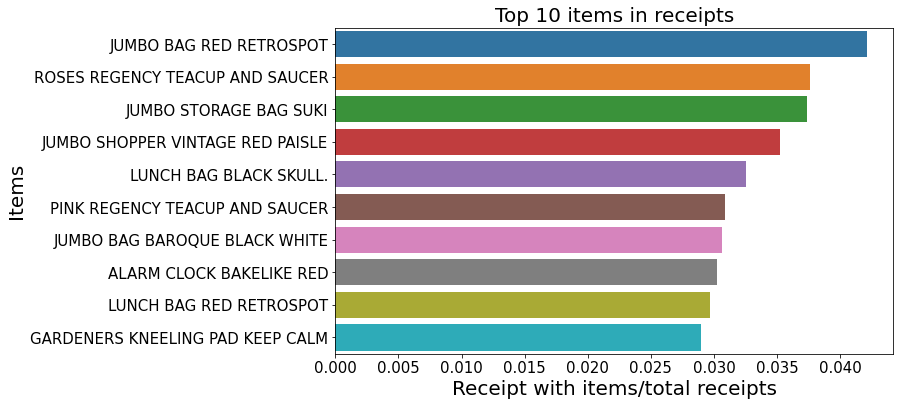

In [32]:
features = ['JUMBO BAG RED RETROSPOT','ROSES REGENCY TEACUP AND SAUCER','JUMBO STORAGE BAG SUKI','JUMBO SHOPPER VINTAGE RED PAISLE','LUNCH BAG BLACK SKULL.','PINK REGENCY TEACUP AND SAUCER','JUMBO BAG BAROQUE BLACK WHITE','ALARM CLOCK BAKELIKE RED','LUNCH BAG RED RETROSPOT','GARDENERS KNEELING PAD KEEP CALM']
importances = [0.0421,0.0376,0.0374,0.0352,0.0325,0.0309,0.0306,0.0302,0.0297,0.0290]

fig, (ax) = plt.subplots(1,figsize = (10, 6))
sns.barplot(x =importances , y = features, ax = ax)
ax.set_ylabel('Items', fontsize = 20)
ax.set_xlabel('Receipt with items/total receipts',fontsize = 20)
ax.tick_params(labelsize=15)
ax.set_title('Top 10 items in receipts', fontsize = 20)
plt.savefig("Top10itemsinreceipts.svg",bbox_inches='tight')

## Training the model

In [33]:
dftop=my_rules1[['antecedents','consequents','consequent support','confidence','lift']]

In [34]:
dftop

,antecedents,consequents,consequent support,confidence,lift
1,(PINK REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...",0.037648,0.701280,18.627443
2,"(ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...",(PINK REGENCY TEACUP AND SAUCER),0.037755,0.703281,18.627443
3,(GREEN REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...",0.029323,0.527837,18.000604
4,"(ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.050161,0.902930,18.000604
5,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER),0.051396,0.854419,16.624127
...,...,...,...,...,...
178,(WHITE HANGING HEART T-LIGHT HOLDER),(HEART OF WICKER SMALL),0.062513,0.173130,2.769488
179,(PARTY BUNTING),(WHITE HANGING HEART T-LIGHT HOLDER),0.116327,0.237139,2.038566
180,(WHITE HANGING HEART T-LIGHT HOLDER),(PARTY BUNTING),0.085607,0.174515,2.038566
181,(JUMBO BAG RED RETROSPOT),(WHITE HANGING HEART T-LIGHT HOLDER),0.116327,0.226522,1.947296


## Looking at other min_support

In [35]:
#Generatig frequent itemsets
my_frequent_itemsets = apriori(my_basket_sets, min_support=0.015, use_colnames=True)

In [36]:
my_rules = association_rules(my_frequent_itemsets, metric="lift", min_threshold=1)

In [37]:
#viewing top 100 rules
my_rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PACK OF 60 PINK PAISLEY CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.041944,0.040440,0.017186,0.409731,10.131731,0.015490,1.625631
1,(60 TEATIME FAIRY CAKE CASES),(PACK OF 60 PINK PAISLEY CAKE CASES),0.040440,0.041944,0.017186,0.424967,10.131731,0.015490,1.666088
2,(60 TEATIME FAIRY CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.040440,0.060634,0.021966,0.543161,8.958062,0.019514,2.056229
3,(PACK OF 72 RETROSPOT CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.060634,0.040440,0.021966,0.362267,8.958062,0.019514,1.504643
4,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE IVORY),0.047046,0.028142,0.016434,0.349315,12.412684,0.015110,1.493593
5,(ALARM CLOCK BAKELIKE IVORY),(ALARM CLOCK BAKELIKE GREEN),0.028142,0.047046,0.016434,0.583969,12.412684,0.015110,2.290586
6,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.047046,0.035231,0.018797,0.399543,11.340698,0.017140,1.606726
7,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.035231,0.047046,0.018797,0.533537,11.340698,0.017140,2.042934
8,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.047046,0.049946,0.030236,0.642694,12.867703,0.027887,2.658936
9,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.049946,0.047046,0.030236,0.605376,12.867703,0.027887,2.414842


In [38]:
my_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PACK OF 60 PINK PAISLEY CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.041944,0.040440,0.017186,0.409731,10.131731,0.015490,1.625631
1,(60 TEATIME FAIRY CAKE CASES),(PACK OF 60 PINK PAISLEY CAKE CASES),0.040440,0.041944,0.017186,0.424967,10.131731,0.015490,1.666088
2,(60 TEATIME FAIRY CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.040440,0.060634,0.021966,0.543161,8.958062,0.019514,2.056229
3,(PACK OF 72 RETROSPOT CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.060634,0.040440,0.021966,0.362267,8.958062,0.019514,1.504643
4,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE IVORY),0.047046,0.028142,0.016434,0.349315,12.412684,0.015110,1.493593
...,...,...,...,...,...,...,...,...,...
615,"(STRAWBERRY CHARLOTTE BAG, RED RETROSPOT CHARL...",(WOODLAND CHARLOTTE BAG),0.024597,0.036681,0.016380,0.665939,18.154878,0.015478,2.883661
616,"(WOODLAND CHARLOTTE BAG, RED RETROSPOT CHARLOT...",(STRAWBERRY CHARLOTTE BAG),0.023147,0.036144,0.016380,0.707657,19.578850,0.015544,3.297000
617,(STRAWBERRY CHARLOTTE BAG),"(WOODLAND CHARLOTTE BAG, RED RETROSPOT CHARLOT...",0.036144,0.023147,0.016380,0.453195,19.578850,0.015544,1.786473
618,(WOODLAND CHARLOTTE BAG),"(STRAWBERRY CHARLOTTE BAG, RED RETROSPOT CHARL...",0.036681,0.024597,0.016380,0.446559,18.154878,0.015478,1.762434


In [39]:
my_rules.sort_values(by=['lift'],ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
406,(REGENCY TEA PLATE ROSES),(REGENCY TEA PLATE GREEN),0.020462,0.018045,0.015091,0.737533,40.871610,0.014722,3.741248
407,(REGENCY TEA PLATE GREEN),(REGENCY TEA PLATE ROSES),0.018045,0.020462,0.015091,0.836310,40.871610,0.014722,5.984087
419,(SMALL DOLLY MIX DESIGN ORANGE BOWL),(SMALL MARSHMALLOWS PINK BOWL),0.027390,0.023093,0.017991,0.656863,28.443684,0.017359,2.846985
418,(SMALL MARSHMALLOWS PINK BOWL),(SMALL DOLLY MIX DESIGN ORANGE BOWL),0.023093,0.027390,0.017991,0.779070,28.443684,0.017359,4.402340
433,(WOODEN STAR CHRISTMAS SCANDINAVIAN),(WOODEN HEART CHRISTMAS SCANDINAVIAN),0.025725,0.027336,0.019764,0.768267,28.104392,0.019060,4.197351
...,...,...,...,...,...,...,...,...,...
14,(ASSORTED COLOUR BIRD ORNAMENT),(WHITE HANGING HEART T-LIGHT HOLDER),0.073631,0.116327,0.016380,0.222465,1.912421,0.007815,1.136507
227,(PARTY BUNTING),(JUMBO BAG RED RETROSPOT),0.085607,0.104082,0.016917,0.197616,1.898664,0.008007,1.116571
226,(JUMBO BAG RED RETROSPOT),(PARTY BUNTING),0.104082,0.085607,0.016917,0.162539,1.898664,0.008007,1.091863
404,(REGENCY CAKESTAND 3 TIER),(WHITE HANGING HEART T-LIGHT HOLDER),0.090494,0.116327,0.018045,0.199407,1.714196,0.007518,1.103773


In [40]:
top10rules = my_rules.sort_values(by=['lift'],ascending=False)

In [41]:
top10rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
406,(REGENCY TEA PLATE ROSES),(REGENCY TEA PLATE GREEN),0.020462,0.018045,0.015091,0.737533,40.871610,0.014722,3.741248
407,(REGENCY TEA PLATE GREEN),(REGENCY TEA PLATE ROSES),0.018045,0.020462,0.015091,0.836310,40.871610,0.014722,5.984087
419,(SMALL DOLLY MIX DESIGN ORANGE BOWL),(SMALL MARSHMALLOWS PINK BOWL),0.027390,0.023093,0.017991,0.656863,28.443684,0.017359,2.846985
418,(SMALL MARSHMALLOWS PINK BOWL),(SMALL DOLLY MIX DESIGN ORANGE BOWL),0.023093,0.027390,0.017991,0.779070,28.443684,0.017359,4.402340
433,(WOODEN STAR CHRISTMAS SCANDINAVIAN),(WOODEN HEART CHRISTMAS SCANDINAVIAN),0.025725,0.027336,0.019764,0.768267,28.104392,0.019060,4.197351
...,...,...,...,...,...,...,...,...,...
14,(ASSORTED COLOUR BIRD ORNAMENT),(WHITE HANGING HEART T-LIGHT HOLDER),0.073631,0.116327,0.016380,0.222465,1.912421,0.007815,1.136507
227,(PARTY BUNTING),(JUMBO BAG RED RETROSPOT),0.085607,0.104082,0.016917,0.197616,1.898664,0.008007,1.116571
226,(JUMBO BAG RED RETROSPOT),(PARTY BUNTING),0.104082,0.085607,0.016917,0.162539,1.898664,0.008007,1.091863
404,(REGENCY CAKESTAND 3 TIER),(WHITE HANGING HEART T-LIGHT HOLDER),0.090494,0.116327,0.018045,0.199407,1.714196,0.007518,1.103773


In [42]:
top10rules.index = np.arange(1,len(top10rules)+1)

In [43]:
top10rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(REGENCY TEA PLATE ROSES),(REGENCY TEA PLATE GREEN),0.020462,0.018045,0.015091,0.737533,40.871610,0.014722,3.741248
2,(REGENCY TEA PLATE GREEN),(REGENCY TEA PLATE ROSES),0.018045,0.020462,0.015091,0.836310,40.871610,0.014722,5.984087
3,(SMALL DOLLY MIX DESIGN ORANGE BOWL),(SMALL MARSHMALLOWS PINK BOWL),0.027390,0.023093,0.017991,0.656863,28.443684,0.017359,2.846985
4,(SMALL MARSHMALLOWS PINK BOWL),(SMALL DOLLY MIX DESIGN ORANGE BOWL),0.023093,0.027390,0.017991,0.779070,28.443684,0.017359,4.402340
5,(WOODEN STAR CHRISTMAS SCANDINAVIAN),(WOODEN HEART CHRISTMAS SCANDINAVIAN),0.025725,0.027336,0.019764,0.768267,28.104392,0.019060,4.197351
...,...,...,...,...,...,...,...,...,...
616,(ASSORTED COLOUR BIRD ORNAMENT),(WHITE HANGING HEART T-LIGHT HOLDER),0.073631,0.116327,0.016380,0.222465,1.912421,0.007815,1.136507
617,(PARTY BUNTING),(JUMBO BAG RED RETROSPOT),0.085607,0.104082,0.016917,0.197616,1.898664,0.008007,1.116571
618,(JUMBO BAG RED RETROSPOT),(PARTY BUNTING),0.104082,0.085607,0.016917,0.162539,1.898664,0.008007,1.091863
619,(REGENCY CAKESTAND 3 TIER),(WHITE HANGING HEART T-LIGHT HOLDER),0.090494,0.116327,0.018045,0.199407,1.714196,0.007518,1.103773


In [44]:
df = top10rules

In [118]:
df.tail(200)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
421,(LUNCH BAG SUKI DESIGN),(LUNCH BAG RED RETROSPOT),0.054887,0.074758,0.027712,0.504892,6.753661,0.023609,1.868769
422,(LUNCH BAG RED RETROSPOT),(LUNCH BAG SUKI DESIGN),0.074758,0.054887,0.027712,0.370690,6.753661,0.023609,1.501823
423,(JUMBO STORAGE BAG SUKI),(RECYCLING BAG RETROSPOT),0.060687,0.038131,0.015628,0.257522,6.753608,0.013314,1.295485
424,(RECYCLING BAG RETROSPOT),(JUMBO STORAGE BAG SUKI),0.038131,0.060687,0.015628,0.409859,6.753608,0.013314,1.591675
425,(JUMBO STORAGE BAG SUKI),(JUMBO BAG APPLES),0.060687,0.047530,0.019388,0.319469,6.721484,0.016503,1.399599
426,(JUMBO BAG APPLES),(JUMBO STORAGE BAG SUKI),0.047530,0.060687,0.019388,0.407910,6.721484,0.016503,1.586434
427,(JUMBO BAG RED RETROSPOT),"(JUMBO BAG PINK VINTAGE PAISLEY, JUMBO SHOPPER...",0.104082,0.021536,0.015038,0.144479,6.708718,0.012796,1.143705
428,"(JUMBO BAG PINK VINTAGE PAISLEY, JUMBO SHOPPER...",(JUMBO BAG RED RETROSPOT),0.021536,0.104082,0.015038,0.698254,6.708718,0.012796,2.969118
429,(LUNCH BAG BLACK SKULL.),(LUNCH BAG RED RETROSPOT),0.065306,0.074758,0.032599,0.499178,6.677218,0.027717,1.847445
430,(LUNCH BAG RED RETROSPOT),(LUNCH BAG BLACK SKULL.),0.074758,0.065306,0.032599,0.436063,6.677218,0.027717,1.657444


In [119]:
df.tail(200).to_excel("tail200.xlsx")  

In [46]:
dftop=df[['antecedents','consequents','antecedent support','consequent support','support','confidence','lift']]

In [47]:
condition1 = dftop['lift']>1

In [48]:
dfcondition=dftop[condition1]

In [49]:
dfcondition.head(200)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
1,(REGENCY TEA PLATE ROSES),(REGENCY TEA PLATE GREEN),0.020462,0.018045,0.015091,0.737533,40.871610
2,(REGENCY TEA PLATE GREEN),(REGENCY TEA PLATE ROSES),0.018045,0.020462,0.015091,0.836310,40.871610
3,(SMALL DOLLY MIX DESIGN ORANGE BOWL),(SMALL MARSHMALLOWS PINK BOWL),0.027390,0.023093,0.017991,0.656863,28.443684
4,(SMALL MARSHMALLOWS PINK BOWL),(SMALL DOLLY MIX DESIGN ORANGE BOWL),0.023093,0.027390,0.017991,0.779070,28.443684
5,(WOODEN STAR CHRISTMAS SCANDINAVIAN),(WOODEN HEART CHRISTMAS SCANDINAVIAN),0.025725,0.027336,0.019764,0.768267,28.104392
...,...,...,...,...,...,...,...
196,"(LUNCH BAG PINK POLKADOT, LUNCH BAG CARS BLUE)",(LUNCH BAG BLACK SKULL.),0.025242,0.065306,0.016112,0.638298,9.773936
197,(JUMBO BAG PINK VINTAGE PAISLEY),"(JUMBO BAG RED RETROSPOT, JUMBO SHOPPER VINTAG...",0.043770,0.035285,0.015038,0.343558,9.736766
198,"(JUMBO BAG RED RETROSPOT, JUMBO SHOPPER VINTAG...",(JUMBO BAG PINK VINTAGE PAISLEY),0.035285,0.043770,0.015038,0.426180,9.736766
199,(WOODEN FRAME ANTIQUE WHITE),(WOODEN PICTURE FRAME WHITE FINISH),0.050591,0.057787,0.028357,0.560510,9.699524


In [50]:
pd.set_option('display.max_rows', None)

In [51]:
dfcondition.tail(200)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
421,(LUNCH BAG SUKI DESIGN),(LUNCH BAG RED RETROSPOT),0.054887,0.074758,0.027712,0.504892,6.753661
422,(LUNCH BAG RED RETROSPOT),(LUNCH BAG SUKI DESIGN),0.074758,0.054887,0.027712,0.370690,6.753661
423,(JUMBO STORAGE BAG SUKI),(RECYCLING BAG RETROSPOT),0.060687,0.038131,0.015628,0.257522,6.753608
424,(RECYCLING BAG RETROSPOT),(JUMBO STORAGE BAG SUKI),0.038131,0.060687,0.015628,0.409859,6.753608
425,(JUMBO STORAGE BAG SUKI),(JUMBO BAG APPLES),0.060687,0.047530,0.019388,0.319469,6.721484
426,(JUMBO BAG APPLES),(JUMBO STORAGE BAG SUKI),0.047530,0.060687,0.019388,0.407910,6.721484
427,(JUMBO BAG RED RETROSPOT),"(JUMBO BAG PINK VINTAGE PAISLEY, JUMBO SHOPPER...",0.104082,0.021536,0.015038,0.144479,6.708718
428,"(JUMBO BAG PINK VINTAGE PAISLEY, JUMBO SHOPPER...",(JUMBO BAG RED RETROSPOT),0.021536,0.104082,0.015038,0.698254,6.708718
429,(LUNCH BAG BLACK SKULL.),(LUNCH BAG RED RETROSPOT),0.065306,0.074758,0.032599,0.499178,6.677218
430,(LUNCH BAG RED RETROSPOT),(LUNCH BAG BLACK SKULL.),0.074758,0.065306,0.032599,0.436063,6.677218


# Making recommendations

In [116]:
my_basket_sets['LUNCH BAG RED RETROSPOT'].sum()

1392

In [77]:
my_basket_sets['WHITE HANGING HEART T-LIGHT HOLDER'].sum()


2166

In [54]:
my_basket_sets['JUMBO BAG RED RETROSPOT'].sum()


1938

In [69]:
mybasket2 = (my_basket_sets['JUMBO BAG RED RETROSPOT']&my_basket_sets['WHITE HANGING HEART T-LIGHT HOLDER'])

In [74]:
mybasket2.value_counts()

0    18181
1      439
dtype: int64

In [114]:
mybasket1 = (my_basket_sets['JUMBO BAG RED RETROSPOT']&my_basket_sets['LUNCH BAG RED RETROSPOT'])

In [115]:
mybasket1.value_counts()

0    18089
1      531
dtype: int64

In [101]:
mybasket.groupby(by=["JUMBO BAG RED RETROSPOT","12 COLOURED PARTY BALLOONS"])

In [55]:
#Filtering rules based on condition
my_rules[ (my_rules['lift'] >= 1) &
       (my_rules['confidence'] >= 0.3) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PACK OF 60 PINK PAISLEY CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.041944,0.040440,0.017186,0.409731,10.131731,0.015490,1.625631
1,(60 TEATIME FAIRY CAKE CASES),(PACK OF 60 PINK PAISLEY CAKE CASES),0.040440,0.041944,0.017186,0.424967,10.131731,0.015490,1.666088
2,(60 TEATIME FAIRY CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.040440,0.060634,0.021966,0.543161,8.958062,0.019514,2.056229
3,(PACK OF 72 RETROSPOT CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.060634,0.040440,0.021966,0.362267,8.958062,0.019514,1.504643
4,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE IVORY),0.047046,0.028142,0.016434,0.349315,12.412684,0.015110,1.493593
5,(ALARM CLOCK BAKELIKE IVORY),(ALARM CLOCK BAKELIKE GREEN),0.028142,0.047046,0.016434,0.583969,12.412684,0.015110,2.290586
6,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.047046,0.035231,0.018797,0.399543,11.340698,0.017140,1.606726
7,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.035231,0.047046,0.018797,0.533537,11.340698,0.017140,2.042934
8,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.047046,0.049946,0.030236,0.642694,12.867703,0.027887,2.658936
9,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.049946,0.047046,0.030236,0.605376,12.867703,0.027887,2.414842


## Appendix other rules

In [56]:
frequent_itemsets = apriori(my_basket_sets, min_support = 0.013, use_colnames = True)

In [57]:
top_items = frequent_itemsets.sort_values('support', ascending = False)[:20]

In [58]:
frequent_itemsets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019 entries, 0 to 1018
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   support   1019 non-null   float64
 1   itemsets  1019 non-null   object 
dtypes: float64(1), object(1)
memory usage: 16.0+ KB


In [59]:
top_items = frequent_itemsets[:10]

In [60]:
for i in range(len(top_items.itemsets)):
    top_items.itemsets.iloc[i] = str(list(top_items.itemsets.iloc[i]))

C:\Users\igung\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-60-19105c4db69d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_items.itemsets.iloc[i] = str(list(top_items.itemsets.iloc[i]))


In [61]:
top_items

,support,itemsets
0,0.014662,['10 COLOUR SPACEBOY PEN']
1,0.017562,['12 PENCIL SMALL TUBE WOODLAND']
2,0.018206,['12 PENCILS SMALL TUBE RED RETROSPOT']
3,0.018099,['12 PENCILS SMALL TUBE SKULL']
4,0.013158,['12 PENCILS TALL TUBE SKULLS']
5,0.013050,['15CM CHRISTMAS GLASS BALL 20 LIGHTS']
6,0.016004,['3 HEARTS HANGING DECORATION RUSTIC']
7,0.019495,['3 HOOK PHOTO SHELF ANTIQUE WHITE']
8,0.017186,['3 PIECE SPACEBOY COOKIE CUTTER SET']
9,0.023469,['3 STRIPEY MICE FELTCRAFT']


Text(0, 0.5, 'Support')

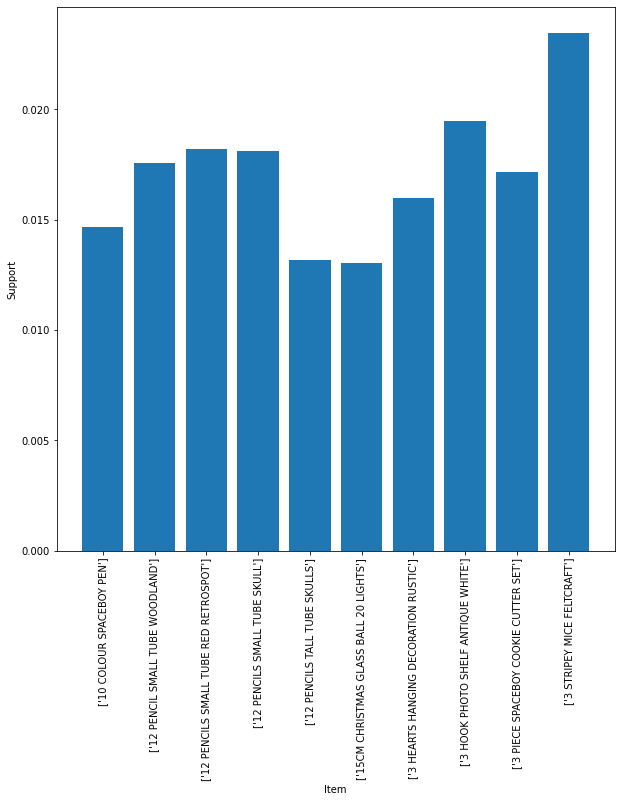

In [62]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.bar(top_items.itemsets, top_items.support)
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(90)
plt.xlabel('Item')
plt.ylabel('Support')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '3 STRIPEY MICE CRAFT'),
  Text(1, 0, '4 TRADI SPINNING TOPS'),
  Text(2, 0, '3 HOOK PHOTO SHELF'),
  Text(3, 0, '12 PENCILS SMALL TUBE'),
  Text(4, 0, '12 PENCILS SKULL'),
  Text(5, 0, '12 PENCIL WOODLAND'),
  Text(6, 0, '3 PIECE SPACEBOY COOKIE'),
  Text(7, 0, '3 HEARTS HANGING DECO'),
  Text(8, 0, '6 GIFT TAGS CHRISTMAS'),
  Text(9, 0, '6 GIFT TAGS VINTAGE')])

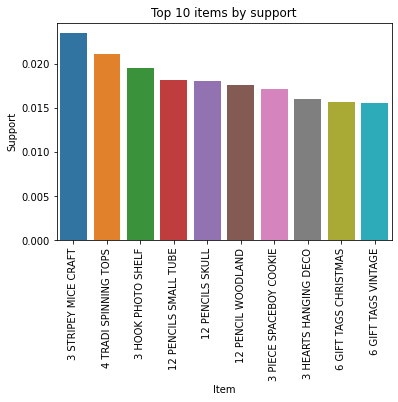

In [63]:
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns

dicti=({'3 STRIPEY MICE CRAFT':0.023469,'4 TRADI SPINNING TOPS':0.021160,'3 HOOK PHOTO SHELF':0.019495,'12 PENCILS SMALL TUBE':0.018206,'12 PENCILS SKULL':0.018099,'12 PENCIL WOODLAND':0.017562,'3 PIECE SPACEBOY COOKIE':0.017186,'3 HEARTS HANGING DECO':0.016004,'6 GIFT TAGS CHRISTMAS':0.015682,'6 GIFT TAGS VINTAGE' :0.015521})

pd_df = pd.DataFrame(list(dicti.items()))
pd_df.columns =["Item","Support"]

# Here the dataframe is already sorted if not use the below line
# pd_df = pd_df.sort_values('Count').reset_index()
# or 
# pd_df = pd_df.sort_values('Count',ascending=False).reset_index()

sns.barplot(x='Item',y='Support',data=pd_df,order = pd_df['Item']).set_title('Top 10 items by support')
plt.xticks(rotation=90)

In [64]:
sortedtop10 = top_items.sort_values(by=['support'],ascending=False)
sortedtop10

,support,itemsets
9,0.023469,['3 STRIPEY MICE FELTCRAFT']
7,0.019495,['3 HOOK PHOTO SHELF ANTIQUE WHITE']
2,0.018206,['12 PENCILS SMALL TUBE RED RETROSPOT']
3,0.018099,['12 PENCILS SMALL TUBE SKULL']
1,0.017562,['12 PENCIL SMALL TUBE WOODLAND']
8,0.017186,['3 PIECE SPACEBOY COOKIE CUTTER SET']
6,0.016004,['3 HEARTS HANGING DECORATION RUSTIC']
0,0.014662,['10 COLOUR SPACEBOY PEN']
4,0.013158,['12 PENCILS TALL TUBE SKULLS']
5,0.013050,['15CM CHRISTMAS GLASS BALL 20 LIGHTS']


In [65]:
top_items['support'].dtypes

dtype('float64')

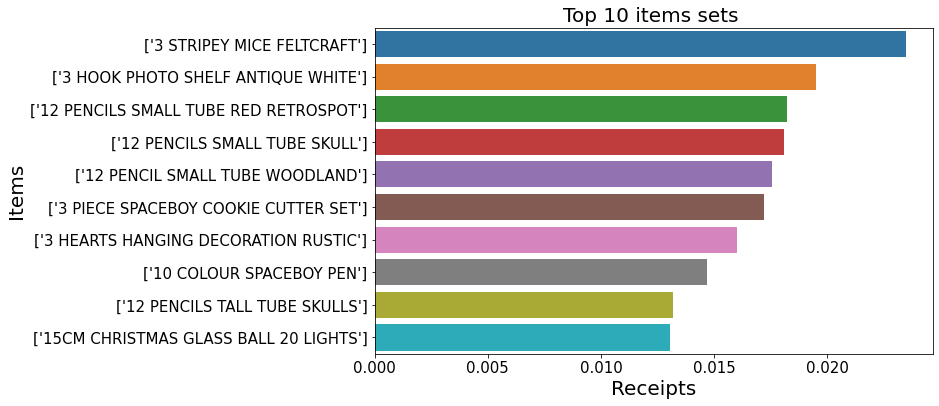

In [66]:
features = sortedtop10['itemsets']
importances = sortedtop10['support']

fig, (ax) = plt.subplots(1,figsize = (10, 6))
sns.barplot(x =importances , y = features, ax = ax)
ax.set_ylabel('Items', fontsize = 20)
ax.set_xlabel('Receipts',fontsize = 20)
ax.tick_params(labelsize=15)
ax.set_title('Top 10 items sets ', fontsize = 20)
plt.savefig("Top10support.svg")